<center>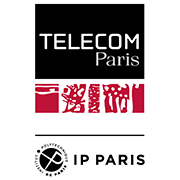</center>

<h1><center><strong><font color="chillipepper">IA 717: Poetry Generation Project</font></strong></center></h1>
<h3><center><font color="blue"><strong>Tasks</strong></font></center></h3>

<center>
<h3> Project Supervisor <br/> Cyril Chhun</h3>
<email>cyril.chhun@telecom-paris.fr</email>
<br/>
Year 2022-2023
</center>

------------------------

## Non-guided work

Below are some suggested improvements to work on. If you prefer to tackle something else than your group's suggested task, that is fine by me, **as long as both groups do not do exactly the same things**. Therefore, feel free to talk with the other group if you want to trade topics and whatnot.

### Group A - Adding rhyme

We have been able to generate verse with relative success, but you might have observed that it was especially lacking in the rhyme department.

Here, we aim to improve this aspect of the generation task, and there are several ways to do that. Below are some suggestions, but you are naturally free to build upon it, or even to do something else entirely if you have ideas on your own (which might be just as good as these).

For instance, we could try to add particular tokens to tell the model which sort of rhyme is at the end of the verse. Similar to the `<eos>` token indicating the end of a verse, we could have different tokens for different rhymes, such as:

```
Tout m'afflige et me nuit, et conspire à me nuire. <uir>
Comme on voit tous ses vœux l’un l’autre se détruire ! <uir>
Vous-même, condamnant vos injustes desseins, <ein>
Tantôt à vous parer vous excitiez nos mains ; <ain>
```

Most of the work will therefore be data preprocessing. We will need to:
1. Build a dictionary which matches words with their corresponding rhyme;
2. Add the matching tokens to each verse in the corpus;
3. Probably train a new model from scratch.

Furthermore, there are a few questions you might want to address, such as:
- What of rhymes which have the same pronunciation but not the same spelling, such as `<ein>` and `<ain>` above?
- Where is the best position for the token to be placed?
- Is there a way to enforce the model to generate a word which matches the rhyme of the preceding verse?
    - You might take inspiration from the work suggested to group B
    
Be aware that doing all this will not necessarily enforce the model to be a full-fledged classical poet. That would be very impressive, actually. However, it *might* lead to some marginal improvements in the generated text. Better than nothing, right?

Now, to your keyboards, and remember to have fun!

### Group B - Implementing different sampling methods

We have been able to generate verse with relative success, but you might have observed that the model tended to repeat itself quite a lot in its outputs.

This is mostly due to the chosen sampling in the `generate` function. Indeed, if you look back at its implementation, you can see that, to generate the next word, we chose to take the `argmax` of the output, ie, the word with the highest probability. This means that the generation process is quite strongly deterministic (as a side question, what makes it not *completely* deterministic?). Below, an illustration of this decision process, which is called a greedy search.

![Greedy search](https://huggingface.co/blog/assets/02_how-to-generate/greedy_search.png)

However, other methods exist, which generally yield better, if not *much* better, results.

You can therefore try to implement them in different `generate` functions. I suggest to you to implement `beam` search, sampling, `top-k` sampling and `top-p` sampling.

- Beam search is basically a greedy search with more depth. It tries to take the best combination of next words, which leads to more variability in the output. Below, you can see that it chooses a different path from greedy search.

![Beam search](https://huggingface.co/blog/assets/02_how-to-generate/beam_search.png)

- Sampling consists in sampling the next word from the probability distribution obtained as output. This often involves a multiplicative coefficient called *temperature* which changes the sharpness of the distribution after softmax application.

![Sampling](https://huggingface.co/blog/assets/02_how-to-generate/sampling_search.png)

- In top-K sampling, the K most likely next words are filtered and the probability mass is redistributed among only those K next words.

![Top-k sampling](https://huggingface.co/blog/assets/02_how-to-generate/top_k_sampling.png)

- In Top-p sampling, instead of sampling only from the most likely K words, we sample from the smallest possible set of words whose cumulative probability exceeds the probability p. The probability mass is then redistributed among this set of words.

![Top-p sampling](https://huggingface.co/blog/assets/02_how-to-generate/top_p_sampling.png)

Some more information is available at [this blog post by HuggingFace](https://huggingface.co/blog/how-to-generate).

Now, to your keyboards, and remember to have fun!

### Further ideas

Below you will find more ideas to explore, should you be willing to spend the required time and effort. You may want to:
- Test different preprocessing combinations
- Fine-tune the model parameters to improve performance (batch, embedding and hidden sizes, number of layers, dropout, learning rate, weight decay...)
- Think of ways to improve batching and sequencing (one which coincides with verses perhaps?)
- Implement the other group's suggested part
- Use pre-trained word embeddings such as [GloVe](https://nlp.stanford.edu/projects/glove/) or [FastText](https://fasttext.cc/). The [torchtext](https://pytorch.org/text/stable/vocab.html#pretrained-word-embeddings) library might be useful.
- Think of ways to add information related to the metre of the verse. Be aware that this is an open question, and I personally would be very interested in your ideas.